<a href="https://colab.research.google.com/github/taolaobd/CS114.L22.KHCL/blob/main/BTAP1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing hand-written digits

Bài toán nhận diện chữ số viết tay từ (0-9) thông qua thư viện **scikit-learn**.

Import các thư viện cần thiết.

In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

In [3]:
datasets.load_digits()

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

Load dữ liệu từ datasets. Trong đó:




*   **images** gồm các ma trận có kích thước 8x8 có giá trị mức xám cho mỗi ảnh.
*   **target** chính là các giá trị đúng mà mỗi bức ảnh đại diện cho.
*   **target_names** là mảng các giá trị từ 0-9 sẽ được gán tương ứng với mỗi bức ảnh.

Dưới đây là 4 ví dụ:





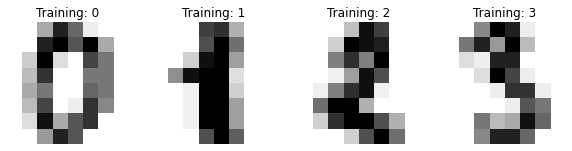

In [4]:

digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Xem thử 4 ma trận ảnh đầu tiên có dạng và vùng giá trị như thế nào ?

In [5]:
for i in range(4):
  print(digits.images[i])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1.

**Nhận xét**: Ma trận 8x8 và các giá trị của ma trận chủ yếu từ 0->16. 


Nhận xét về bộ dữ liệu:

In [6]:
digits.images.shape

(1797, 8, 8)

Bộ dữ liệu chúng ta có đúng 1797 ma trận 8x8 với mức giá trị xám. Bộ dữ liệu được cấp này là khá ít để 1 model có thể đạt được độ chính xác cao.

## Classification

Để áp dụng mô hình phân lớp trên dữ liệu này, chúng ta cần phải flatten (dàn hoặc trải ) bức ảnh, chuyển từ mảng 2 chiều có giá trị mức xám có kích thước (8,8) trở thành 1 vector (64,).

Chúng ta chia bộ dữ liệu thành 2 phần con:


*   Train subset 50% (Sử dụng phương pháp SVM có tham số gamma=0.001)
*   Test subset 50%



In [7]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Dưới đây là kết quả của 4 ví dụ đầu tiên:

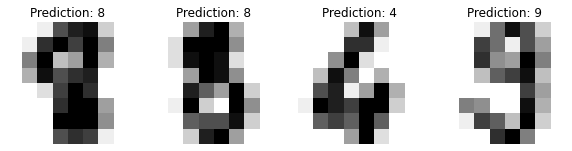

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [9]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


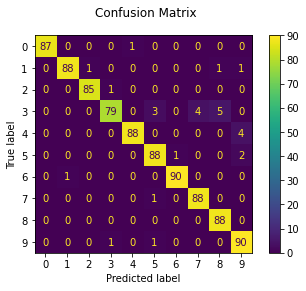

In [10]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Test cùng camera

In [ ]:
"""from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename ,quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename"""

In [11]:
labelx=[2,4,5,7,8,9,3,6,1,4,0,9,1]#đáng lẽ ảnh được gán label trong khi lúc chụp nhưng vì để thuận tiện nên nhóm đã lưu lại ảnh đã chụp trước đó rồi gán label sau. Phần code ở Section "Code cùng camera" 
#chính là đoạn code nhóm dùng để vừa chụp vừa gán label.

In [ ]:
"""from IPython.display import Image
for i in range(9):
  try:
    temp='photo%s.jpg'%i
    filename = take_photo(temp)
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
    #labelx.append(input('Nhập label cho test này: '))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))"""

In [12]:
import cv2

In [13]:
X_test_temp=[]

Đọc ảnh các ảnh vừa thu thập được (ma trận pixel). Sau đó resize nó về ma trận 8x8 rồi vectorize về (64,1) để có thể phù hợp với đầu vào của mô hình.

In [14]:
for i in range(13):
  temp='photo%s.jpg'%i  
  img=cv2.imread(temp)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#chuyển về ảnh xám
  #img=(img/255)*10
  #(thresh, img_test) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
  img_test = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)
  img_test=img_test.reshape(1,64)
  """for j in range(64):
    if img_test[0][j]>=128:
      img_test[0][j]=0"""
  #img_test=(img_test/255)*10
  X_test_temp.append(img_test)

In [15]:
predicted_test=[]

In [16]:
for i in X_test_temp:
  temp = clf.predict(i)
  predicted_test.append(temp)

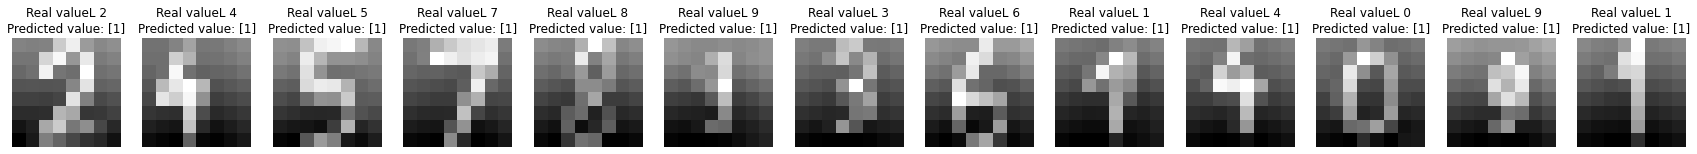

In [17]:
_, axes = plt.subplots(nrows=1, ncols=13, figsize=(30, 3))
for ax, image, prediction,k in zip(axes, X_test_temp, predicted_test,labelx):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real valueL {k}\nPredicted value: {prediction}')

**Nhận xét:** với 1 bức ảnh được chụp cùng camera lap bất kì, thì model luôn dự đoán giá trị là 1 (tỷ lệ là 1/13). Điều này chứng tỏ nhận diện chữ số trên mặt giấy khi chụp bằng webcam laptop là **KHÔNG TỐT**, không phù hợp.

## Thử thay đổi ma trận đầu vào để phù hợp với dữ liệu scikit-learn:

Show thử ma trận của những bức ảnh được chụp từ camera có vùng giá trị như thế nào ?

In [18]:
X_test_temp

[array([[117, 119, 118,  79,  60, 105, 115, 111, 125, 125,  74,  55, 107,
          63, 122, 118, 132, 128,  58, 125, 129,  51, 128, 125, 143, 142,
         143, 142, 116,  66, 135, 133, 153, 153, 154, 151,  66, 119, 148,
         144, 164, 164, 163,  91,  98, 159, 158, 153, 177, 170,  98,  79,
         124, 112, 150, 166, 188, 174, 120, 134, 150, 161, 166, 178]],
       dtype=uint8),
 array([[119, 119, 110,  92, 117, 116, 111, 106, 121, 121,  67,  83, 120,
         119, 116, 111, 127, 121,  44, 120, 128, 127, 125, 119, 135,  79,
          54,  40,  81, 138, 134, 130, 143,  55,  68,  45, 102, 149, 145,
         141, 154, 156, 158,  66, 141, 160, 157, 153, 165, 169, 172,  75,
         160, 173, 168, 162, 177, 181, 184, 129, 180, 182, 177, 170]],
       dtype=uint8),
 array([[113, 114,  88,  65,  62,  57,  93, 117, 116, 119,  67,  94, 111,
         111, 114, 119, 125, 128,  73, 111, 130, 129, 127, 125, 137, 139,
          76,  67,  69,  95, 135, 131, 147, 151, 131, 111, 113,  84, 140,
  

Có vẻ như ma trận có được từ ảnh chụp được từ camera của máy chúng em thường có giá trị trong khoảng 0->200. Trong khi tập dữ liệu dùng để train là 0->16. Nên chúng em nghĩ cần phải scale các ma trận này trước khi đưa vào dự đoán để có thể có 1 kết quả khả quan hơn.

Cụ thể: Vùng giá trị của ma trận là 0->200 muốn scale về 0->16. Tức k=200/16~=13. Vậy chúng ta sẽ chia ma trận cho 13

In [19]:
for i in range(len(X_test_temp)):
  X_test_temp[i]=(X_test_temp[i]/13)

In [20]:
X_test_temp

[array([[ 9.        ,  9.15384615,  9.07692308,  6.07692308,  4.61538462,
          8.07692308,  8.84615385,  8.53846154,  9.61538462,  9.61538462,
          5.69230769,  4.23076923,  8.23076923,  4.84615385,  9.38461538,
          9.07692308, 10.15384615,  9.84615385,  4.46153846,  9.61538462,
          9.92307692,  3.92307692,  9.84615385,  9.61538462, 11.        ,
         10.92307692, 11.        , 10.92307692,  8.92307692,  5.07692308,
         10.38461538, 10.23076923, 11.76923077, 11.76923077, 11.84615385,
         11.61538462,  5.07692308,  9.15384615, 11.38461538, 11.07692308,
         12.61538462, 12.61538462, 12.53846154,  7.        ,  7.53846154,
         12.23076923, 12.15384615, 11.76923077, 13.61538462, 13.07692308,
          7.53846154,  6.07692308,  9.53846154,  8.61538462, 11.53846154,
         12.76923077, 14.46153846, 13.38461538,  9.23076923, 10.30769231,
         11.53846154, 12.38461538, 12.76923077, 13.69230769]]),
 array([[ 9.15384615,  9.15384615,  8.46153846, 

**Predict:**

In [21]:
predicted_test=[]

In [22]:
for i in X_test_temp:
  temp = clf.predict(i)
  predicted_test.append(temp)

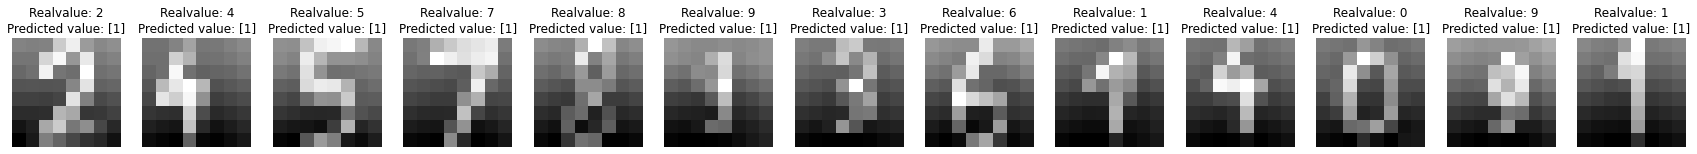

In [23]:
_, axes = plt.subplots(nrows=1, ncols=13, figsize=(30, 3))
for ax, image, prediction,k in zip(axes, X_test_temp, predicted_test,labelx):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Realvalue: {k}\nPredicted value: {prediction}')

Kết quả vẫn không tốt và thiên vị về kết quả là số 1. Nhìn vào các bức ảnh thì có thể đoán có lẽ rằng: 1 trong những lí do là nó đang hiển thị ngược lại so với những gì chúng ta mong muốn (phần số thì lại trắng, còn phần nền thì lại đen đi) Khác với dữ liệu từ scikit-learn. Thử đảo lại giá trị ma trận xem sao ?

Chúng ta đã biến đổi các ma trận đầu vào bằng cách chia cho 13. Đảo lại ==> KQ=13-(Matrix/13).

In [24]:
for i in range(len(X_test_temp)):
  X_test_temp[i]=13-(X_test_temp[i])

In [25]:
X_test_temp

[array([[ 4.        ,  3.84615385,  3.92307692,  6.92307692,  8.38461538,
          4.92307692,  4.15384615,  4.46153846,  3.38461538,  3.38461538,
          7.30769231,  8.76923077,  4.76923077,  8.15384615,  3.61538462,
          3.92307692,  2.84615385,  3.15384615,  8.53846154,  3.38461538,
          3.07692308,  9.07692308,  3.15384615,  3.38461538,  2.        ,
          2.07692308,  2.        ,  2.07692308,  4.07692308,  7.92307692,
          2.61538462,  2.76923077,  1.23076923,  1.23076923,  1.15384615,
          1.38461538,  7.92307692,  3.84615385,  1.61538462,  1.92307692,
          0.38461538,  0.38461538,  0.46153846,  6.        ,  5.46153846,
          0.76923077,  0.84615385,  1.23076923, -0.61538462, -0.07692308,
          5.46153846,  6.92307692,  3.46153846,  4.38461538,  1.46153846,
          0.23076923, -1.46153846, -0.38461538,  3.76923077,  2.69230769,
          1.46153846,  0.61538462,  0.23076923, -0.69230769]]),
 array([[ 3.84615385,  3.84615385,  4.53846154, 

**Predict:**

In [26]:
predicted_test=[]

In [27]:
for i in X_test_temp:
  temp = clf.predict(i)
  predicted_test.append(temp)

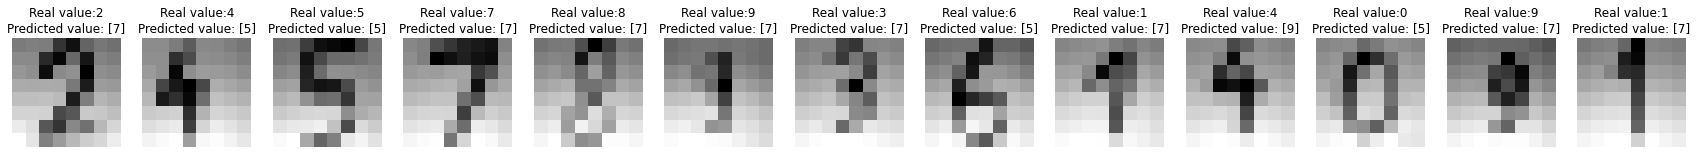

In [28]:
_, axes = plt.subplots(nrows=1, ncols=13, figsize=(30, 3))
for ax, image, prediction,k in zip(axes, X_test_temp, predicted_test,labelx):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real value:{k}\nPredicted value: {prediction}')

WOW, kết quả lần này có vẻ khả quan hơn 1 tí nhưng vẫn KHÔNG TỐT. Đúng 2/13,nhưng ảnh đầu vào cũng hiển thị đúng như những gì chúng ta mong đợi!

# Trả lời câu hỏi

## Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

Như đã thấy, kết quả chạy thực tế với webcam của laptop là rất tệ mặc dù đã xử lí trước dữ liệu cho phù hợp! Khác xa với dữ liệu của scikit-learn cung cấp. 

**Kết luận**: Đầu vào là ảnh chụp từ camera laptop **không đạt kết quả cao**.

## Ủa mà nhìn vào đâu để kết luận là tốt hay không?

Nhìn vào  **Predicted value,Real value**  (đã được nhóm tự gán để thử nghiệm) và so sánh 2 giá trị này. Có thể thấy tỷ lệ chính xác là rất thấp.


## Nếu không tốt thì lý do tại sao?

Có rất nhiều lý do ảnh hưởng đến kết quả:


1.   Dữ liệu: là quá ít (chỉ có 1797 ma trận 8x8) ==> Không đủ cho 1 mô hình có thể train để đánh giá tốt các dạng dữ liệu đa dạng đến từ nguồn khác(camera laptop, ảnh cắt xén bất kì ...)
2.   Ảnh đầu vào: Do ánh sáng, độ ẩm , góc nghiêng, kích cỡ, phần nền không hoàn toàn trắng, phần số không hoàn toàn đen... Rất nhiều yếu tố ảnh hưởng đến chất lượng ảnh đầu vào ==> Ma trận đầu vào sẽ khác xa nhiều so với dữ liệu đến từ scikit-learn cung cấp. Nên tất nhiên độ chính xác sẽ không được cao như mong đợi.



## Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

Như nhóm đã kết luận ở trên ! Thì kết quả chạy với đầu vào là ảnh từ webcam laptop là KHÔNG TỐT. Nên tất nhiên đối với bài toán nhận diện số nhà (ảnh đầu vào không chỉ có số mà còn nhiều thành phần khác(chữ, cổng nhà, vật thể lạ...) và số cần dự đoán không còn là đối tượng chính của bức ảnh ,hơn nữa nhiều yếu tố ảnh hưởng khác hơn cả ảnh được chụp từ webcam laptop ) là rất khó để nhận diện.

**Kết luận:** Không thể áp dụng model này để ứng dụng vào bài toán phức tạp hơn như nhận diện biển số nhà được!